In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
import random
from IPython import display

In [3]:
local_string = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\5minTest.csv'
indoorData = pd.read_csv(local_string)
indoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,16:13:21,1,2,3,23.923555,15544,16.210994,1012.329937,7.662967,NaN
1,16:13:23,1,2,3,23.937812,5021,16.211696,1012.328199,7.677450,NaN
2,16:13:24,0,1,2,23.969453,9966,16.188729,1012.329972,7.662683,NaN
3,16:13:25,0,1,2,24.000508,14292,16.146121,1012.325614,7.698987,NaN
4,16:13:26,0,1,2,24.029414,17669,16.103419,1012.329637,7.665467,NaN
...,...,...,...,...,...,...,...,...,...,...
247,16:18:16,0,1,1,24.386250,61659,15.572760,1012.353234,7.468870,NaN
248,16:18:18,0,1,1,24.385078,61704,15.553176,1012.354694,7.456701,NaN
249,16:18:19,0,1,1,24.383516,61568,15.562865,1012.352069,7.478569,NaN
250,16:18:20,0,1,1,24.382734,61433,15.543302,1012.352472,7.475218,NaN


In [4]:
local_string1 = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\OutdoorData.csv'
outdoorData = pd.read_csv(local_string1)
outdoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
0,14:59:39,1,6,8,21.294648,8733,24.916397,997.310859,133.557492,NaN
1,14:59:41,1,6,7,21.310859,963,24.676618,997.308800,133.574858,NaN
2,14:59:42,0,5,6,21.346016,1465,24.438582,997.314338,133.528158,NaN
3,14:59:43,0,5,6,21.380977,1983,24.242660,997.319546,133.484234,NaN
4,14:59:44,0,4,6,21.412031,2517,24.109254,997.326789,133.423152,NaN
...,...,...,...,...,...,...,...,...,...,...
348,15:06:35,0,1,1,20.327852,69028,20.167744,996.219137,142.768355,NaN
349,15:06:36,0,1,1,20.282734,69601,20.185267,996.220798,142.754333,NaN
350,15:06:37,0,1,1,20.243281,69834,20.213192,996.226754,142.704057,NaN
351,15:06:39,0,1,1,20.190156,69834,20.235287,996.223603,142.730653,NaN


In [5]:
time_mask = outdoorData['Time']>'15:01:39'
goodOutdoorData = outdoorData[time_mask]
goodOutdoorData

,Time,PM 1.0,PM 2.5,PM 10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 9
101,15:01:40,1,1,2,14.836445,42426,27.646399,996.367843,141.513241,NaN
102,15:01:41,1,1,2,14.824141,42729,28.223678,996.428321,141.002834,NaN
103,15:01:43,1,1,2,14.796211,42992,27.918976,996.400202,141.240141,NaN
104,15:01:44,1,1,2,14.756562,43437,27.947905,996.382881,141.386325,NaN
105,15:01:45,1,1,2,14.708906,43709,27.933819,996.384242,141.374834,NaN
...,...,...,...,...,...,...,...,...,...,...
348,15:06:35,0,1,1,20.327852,69028,20.167744,996.219137,142.768355,NaN
349,15:06:36,0,1,1,20.282734,69601,20.185267,996.220798,142.754333,NaN
350,15:06:37,0,1,1,20.243281,69834,20.213192,996.226754,142.704057,NaN
351,15:06:39,0,1,1,20.190156,69834,20.235287,996.223603,142.730653,NaN


Indoor Data:

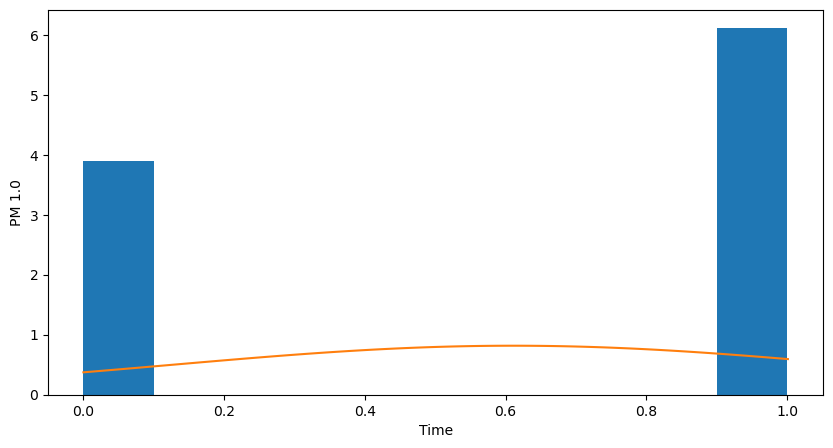

In [6]:
meanPM1 = indoorData['PM 1.0'].mean()
stdPM1 = indoorData['PM 1.0'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 1.0')
ax1.hist(indoorData['PM 1.0'],density = True);
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),meanPM1,stdPM1));

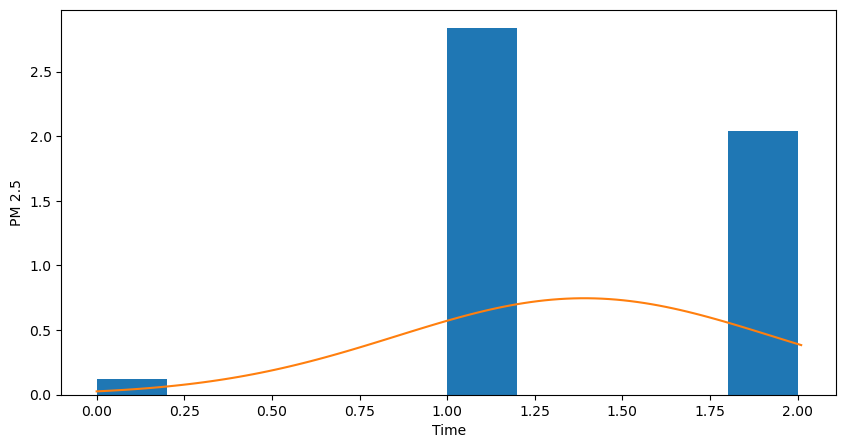

In [7]:
meanPM25 = indoorData['PM 2.5'].mean()
stdPM25 = indoorData['PM 2.5'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 2.5')
ax1.hist(indoorData['PM 2.5'],density = True);
ax1.plot(np.linspace(0,2.01,100), norm.pdf(np.linspace(0,2.001,100),meanPM25,stdPM25));

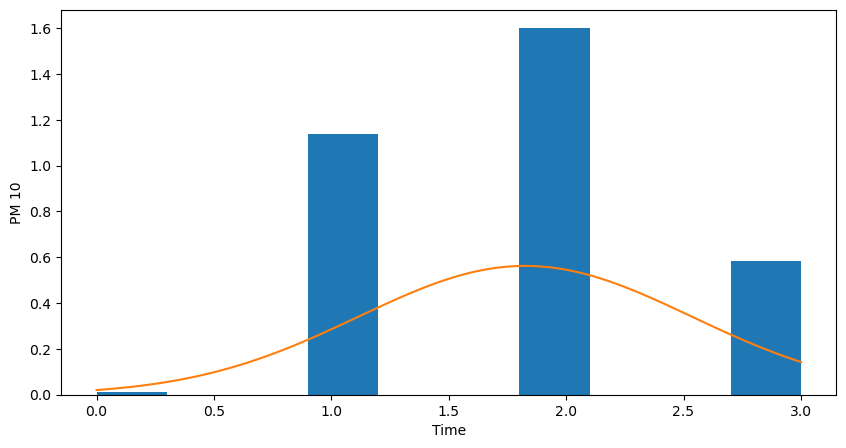

In [8]:
meanPM10 = indoorData['PM 10'].mean()
stdPM10 = indoorData['PM 10'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 10')
ax1.hist(indoorData['PM 10'],density = True);
ax1.plot(np.linspace(0,3.001,100), norm.pdf(np.linspace(0,3.001,100),meanPM10,stdPM10));

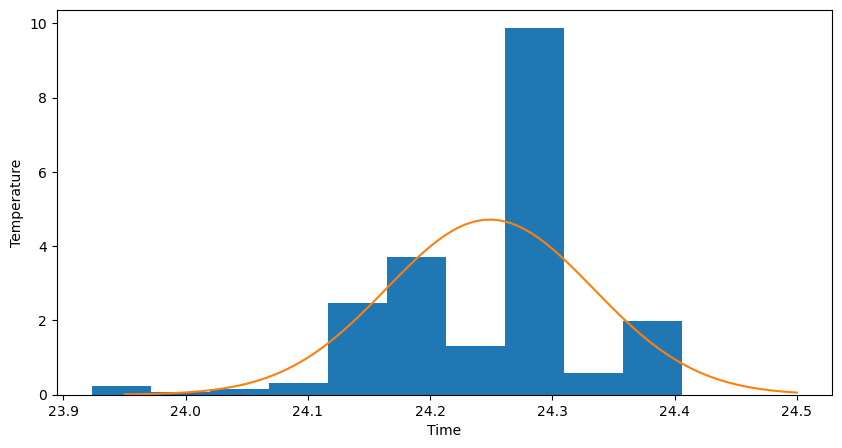

In [9]:
meanT = indoorData['Temperature'].mean()
stdT = indoorData['Temperature'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Temperature')
ax1.hist(indoorData['Temperature'],density = True);
ax1.plot(np.linspace(23.95,24.5,100), norm.pdf(np.linspace(23.95,24.5,100),meanT,stdT));

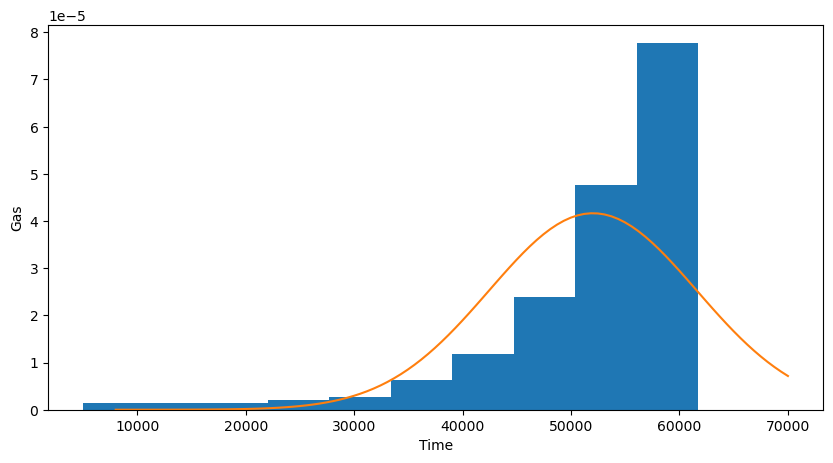

In [10]:
meanG = indoorData['Gas'].mean()
stdG = indoorData['Gas'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Gas')
ax1.hist(indoorData['Gas'],density = True);
ax1.plot(np.linspace(8000,70000,100), norm.pdf(np.linspace(8000,70000,100),meanG,stdG));

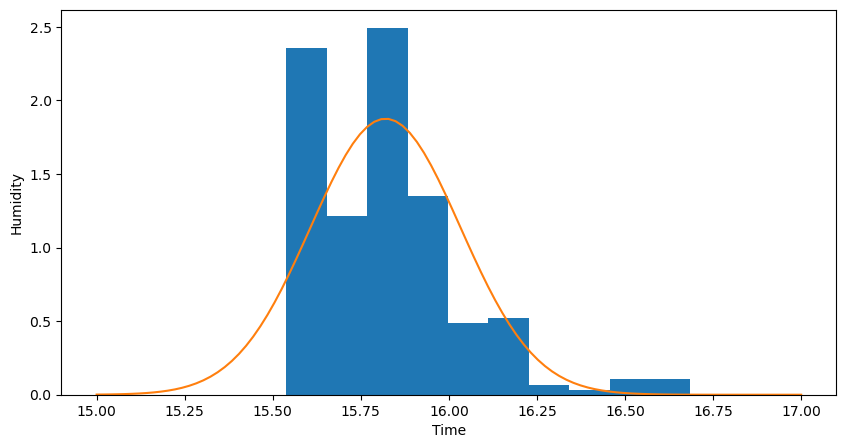

In [11]:
meanH = indoorData['Humidity'].mean()
stdH = indoorData['Humidity'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Humidity')
ax1.hist(indoorData['Humidity'],density = True);
ax1.plot(np.linspace(15,17,100), norm.pdf(np.linspace(15,17,100),meanH,stdH));

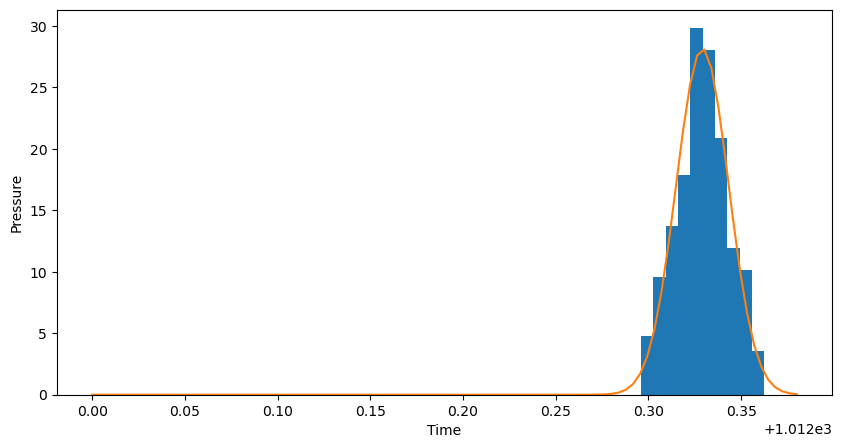

In [12]:
meanP = indoorData['Pressure'].mean()
stdP = indoorData['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Pressure')
ax1.hist(indoorData['Pressure'],density = True);
ax1.plot(np.linspace(1012,1012.38,100), norm.pdf(np.linspace(1012,1012.38,100),meanP,stdP));

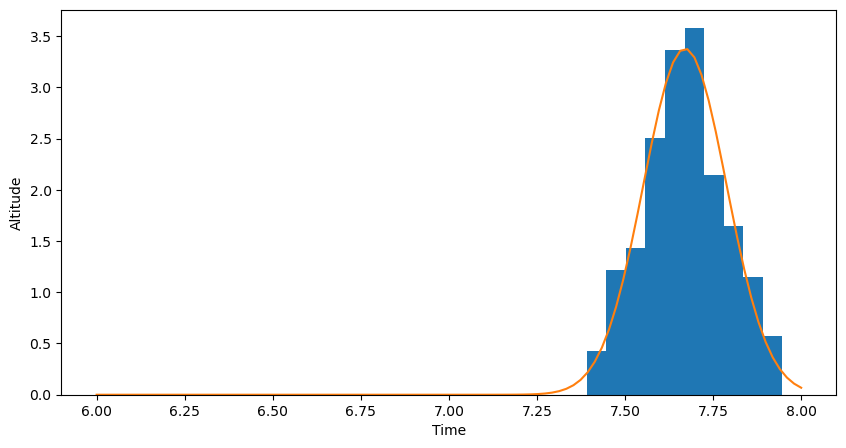

In [13]:
meanA = indoorData['Altitude'].mean()
stdA = indoorData['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Altitude')
ax1.hist(indoorData['Altitude'],density = True);
ax1.plot(np.linspace(6,8,100), norm.pdf(np.linspace(6,8,100),meanA,stdA));

Outdoor Data:

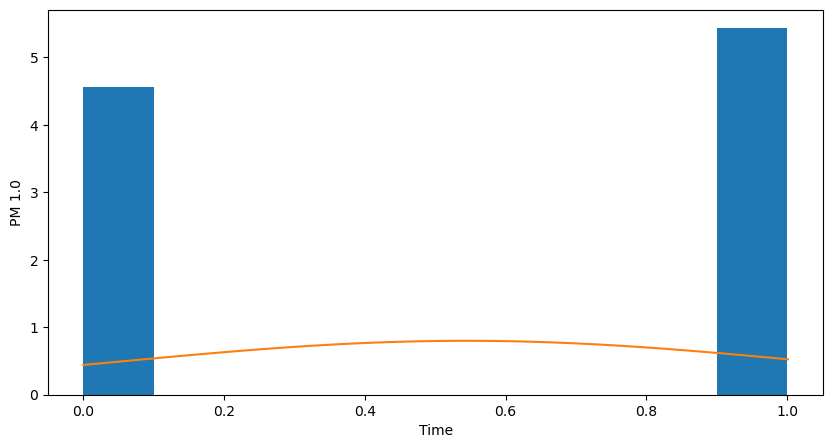

In [14]:
mean1o = goodOutdoorData['PM 1.0'].mean()
std1o = goodOutdoorData['PM 1.0'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.ylabel('PM 1.0')
plt.xlabel('Time')
ax1.hist(goodOutdoorData['PM 1.0'],density = True);
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),mean1o,std1o));

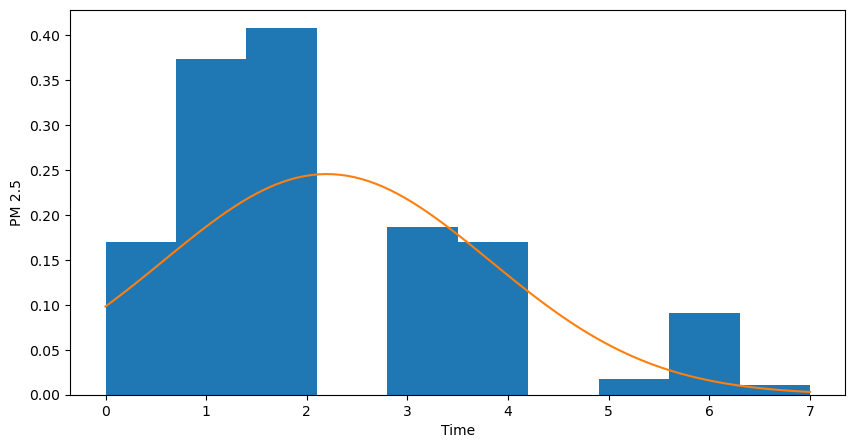

In [15]:
mean25o = goodOutdoorData['PM 2.5'].mean()
std25o = goodOutdoorData['PM 2.5'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 2.5')
ax1.hist(goodOutdoorData['PM 2.5'],density = True);
ax1.plot(np.linspace(0,7.001,100), norm.pdf(np.linspace(0,7.001,100),mean25o,std25o));

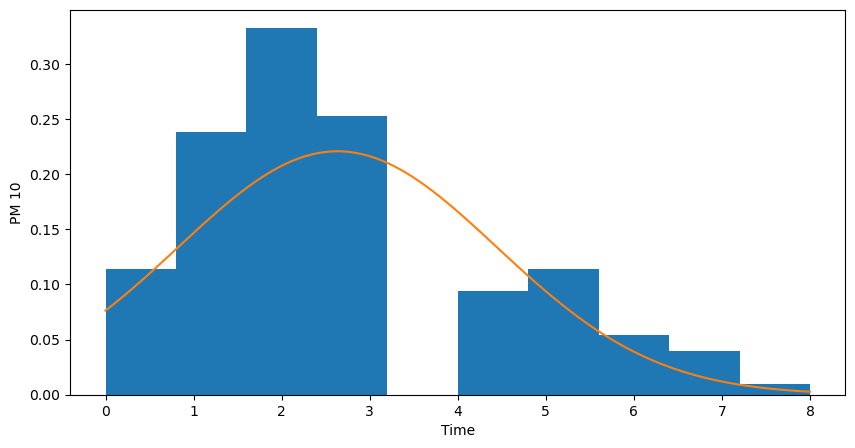

In [16]:
mean10o = goodOutdoorData['PM 10'].mean()
std10o = goodOutdoorData['PM 10'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 10')
ax1.hist(goodOutdoorData['PM 10'],density = True);
ax1.plot(np.linspace(0,8.001,100), norm.pdf(np.linspace(0,8.001,100),mean10o,std10o));

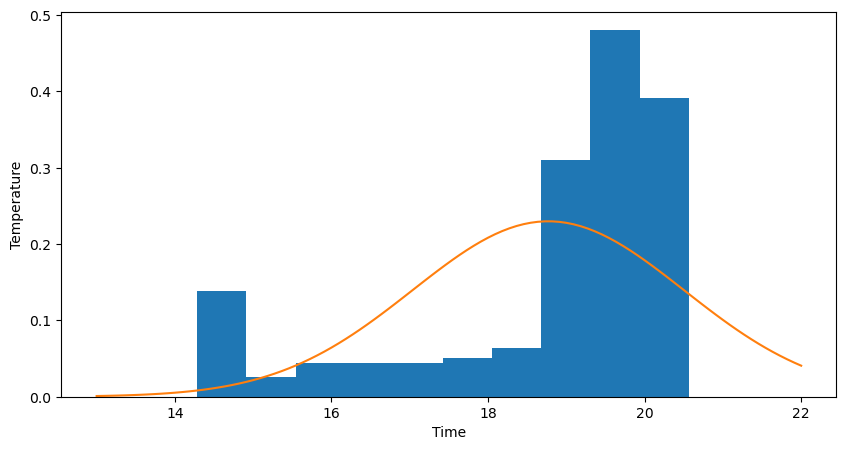

In [17]:
meanTo = goodOutdoorData['Temperature'].mean()
stdTo = goodOutdoorData['Temperature'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Temperature')
ax1.hist(goodOutdoorData['Temperature'],density = True);
ax1.plot(np.linspace(13,22,100), norm.pdf(np.linspace(13,22,100),meanTo,stdTo));

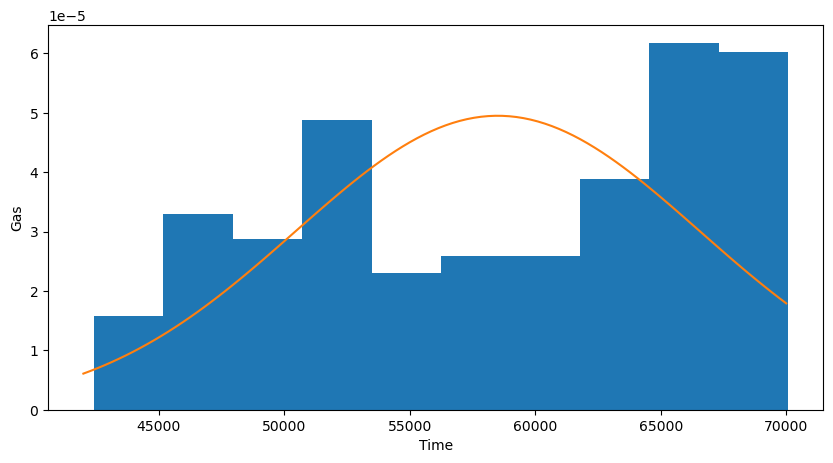

In [18]:
meanGo = goodOutdoorData['Gas'].mean()
stdGo = goodOutdoorData['Gas'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Gas')
ax1.hist(goodOutdoorData['Gas'],density = True);
ax1.plot(np.linspace(42000,70000.01,100), norm.pdf(np.linspace(42000,70000.1,100),meanGo,stdGo));

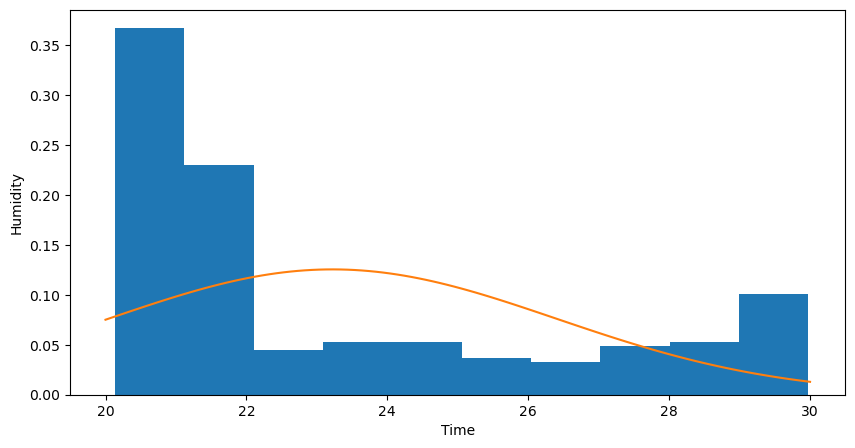

In [19]:
meanHo = goodOutdoorData['Humidity'].mean()
stdHo = goodOutdoorData['Humidity'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.ylabel('Humidity')
plt.xlabel('Time')
ax1.hist(goodOutdoorData['Humidity'],density = True);
ax1.plot(np.linspace(20,30.001,100), norm.pdf(np.linspace(20,30.001,100),meanHo,stdHo));

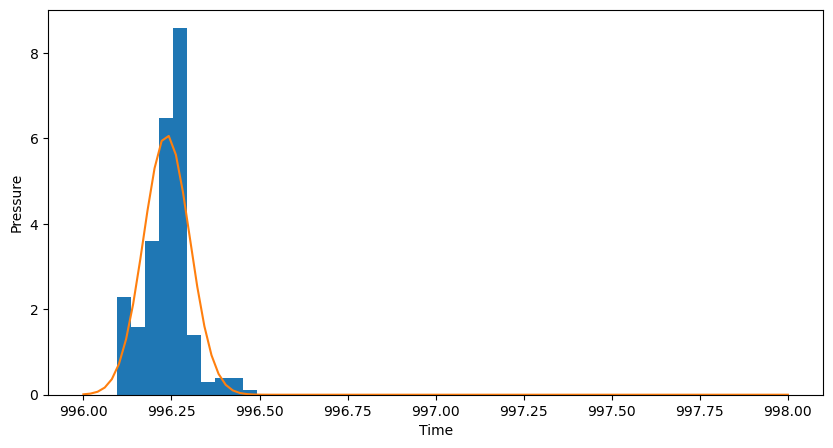

In [20]:
meanPo = goodOutdoorData['Pressure'].mean()
stdPo = goodOutdoorData['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Pressure')
ax1.hist(goodOutdoorData['Pressure'],density = True);
ax1.plot(np.linspace(996,998,100), norm.pdf(np.linspace(996,998,100),meanPo,stdPo));

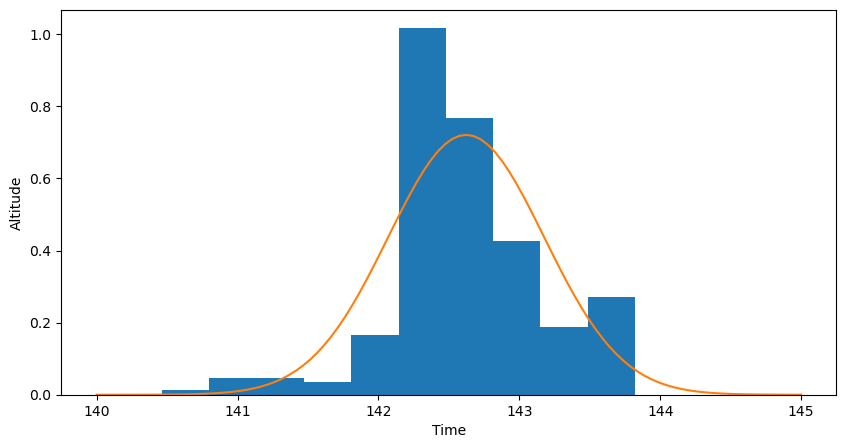

In [21]:
meanAo = goodOutdoorData['Altitude'].mean()
stdAo = goodOutdoorData['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Altitude')
ax1.hist(goodOutdoorData['Altitude'],density = True);
ax1.plot(np.linspace(140,145,100), norm.pdf(np.linspace(140,145,100),meanAo,stdAo));

Comparison Graphs:

uncertainty / sqrt(observation)

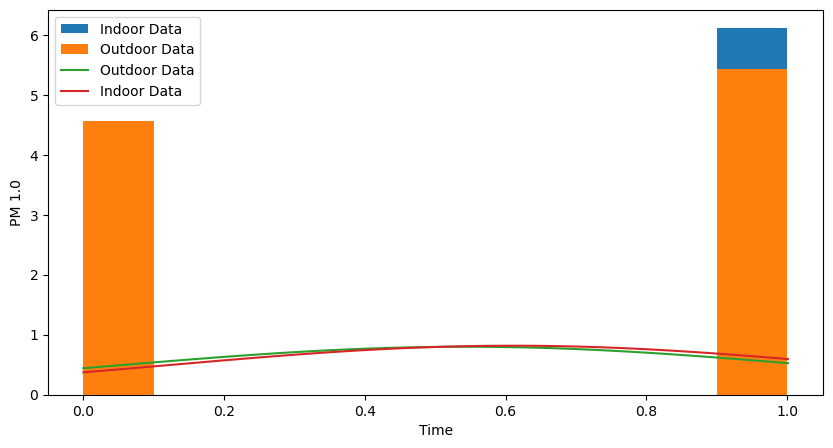

In [22]:
meanPM1 = indoorData['PM 1.0'].mean()
stdPM1 = indoorData['PM 1.0'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 1.0')
ax1.hist(indoorData['PM 1.0'],density = True,label = 'Indoor Data');
ax1.hist(goodOutdoorData['PM 1.0'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),mean1o,std1o),label = 'Outdoor Data');
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),meanPM1,stdPM1), label = 'Indoor Data');
ax1.legend(loc = 'upper left');

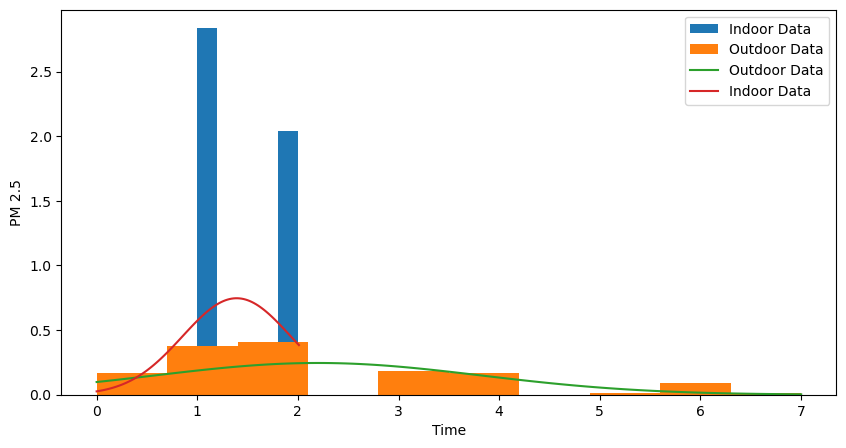

In [23]:
meanPM25 = indoorData['PM 2.5'].mean()
stdPM25 = indoorData['PM 2.5'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 2.5')
ax1.hist(indoorData['PM 2.5'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['PM 2.5'],density = True,label = 'Outdoor Data');
ax1.plot(np.linspace(0,7.001,100), norm.pdf(np.linspace(0,7.001,100),mean25o,std25o),label = 'Outdoor Data');
ax1.plot(np.linspace(0,2.01,100), norm.pdf(np.linspace(0,2.001,100),meanPM25,stdPM25), label = 'Indoor Data');
ax1.legend(loc = 'upper right');

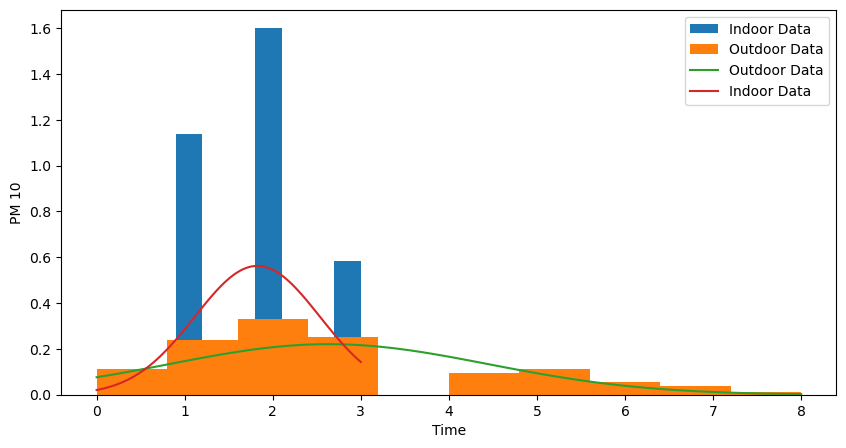

In [24]:
meanPM10 = indoorData['PM 10'].mean()
stdPM10 = indoorData['PM 10'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 10')
ax1.hist(indoorData['PM 10'],density = True,label = 'Indoor Data');
ax1.hist(goodOutdoorData['PM 10'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(0,8.001,100), norm.pdf(np.linspace(0,8.001,100),mean10o,std10o), label = 'Outdoor Data');
ax1.plot(np.linspace(0,3.001,100), norm.pdf(np.linspace(0,3.001,100),meanPM10,stdPM10),label = 'Indoor Data');
ax1.legend(loc = 'upper right');

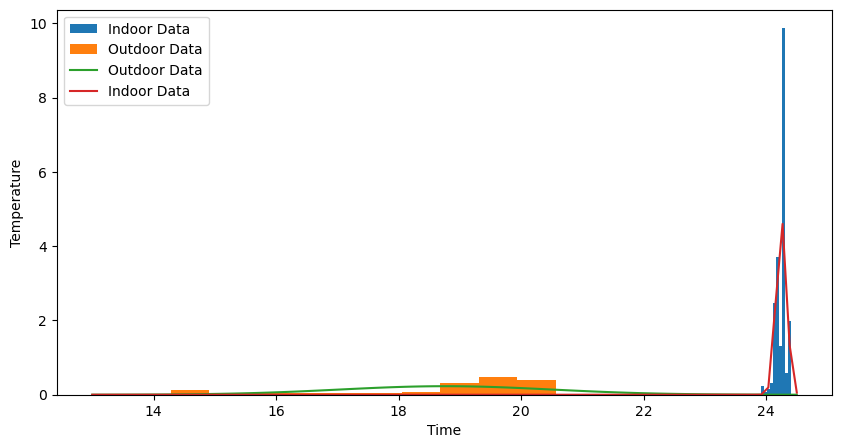

In [25]:
meanT = indoorData['Temperature'].mean()
stdT = indoorData['Temperature'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Temperature')
ax1.hist(indoorData['Temperature'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['Temperature'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(13,24.5,100), norm.pdf(np.linspace(13,24.5,100),meanTo,stdTo), label = 'Outdoor Data');
ax1.plot(np.linspace(13,24.5,100), norm.pdf(np.linspace(13,24.5,100),meanT,stdT), label = 'Indoor Data');
ax1.legend();

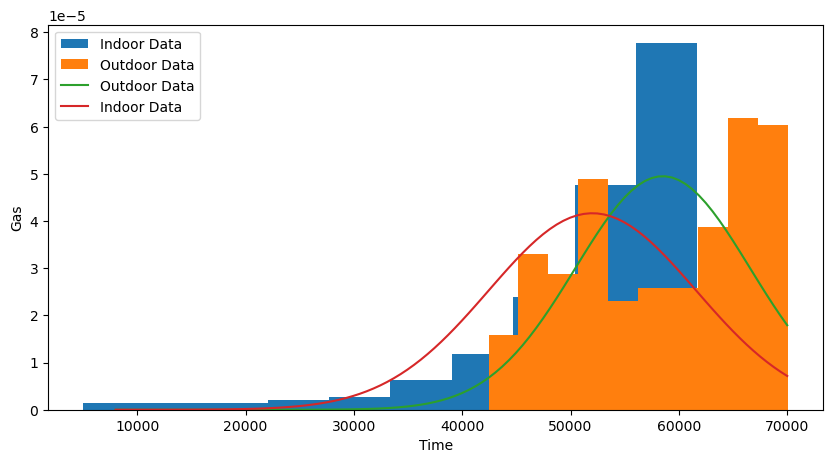

In [26]:
meanG = indoorData['Gas'].mean()
stdG = indoorData['Gas'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Gas')
ax1.hist(indoorData['Gas'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['Gas'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(8000,70000.01,100), norm.pdf(np.linspace(8000,70000.1,100),meanGo,stdGo), label = 'Outdoor Data');
ax1.plot(np.linspace(8000,70000,100), norm.pdf(np.linspace(8000,70000,100),meanG,stdG),label = 'Indoor Data');
ax1.legend();

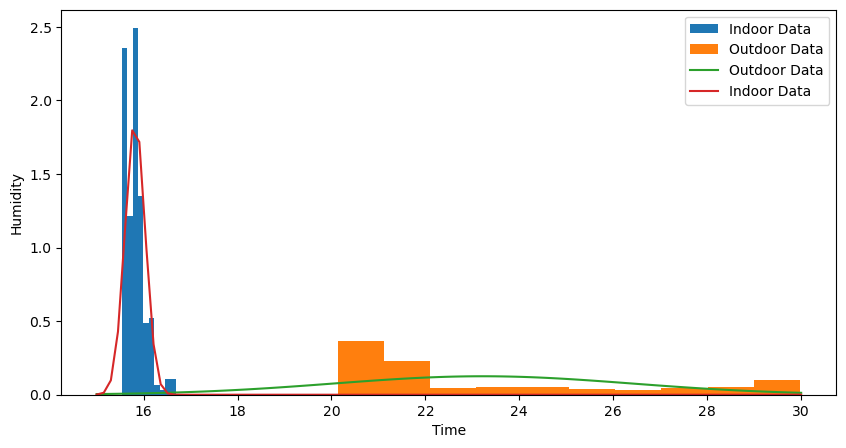

In [27]:
meanH = indoorData['Humidity'].mean()
stdH = indoorData['Humidity'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Humidity')
ax1.hist(indoorData['Humidity'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['Humidity'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(15,30.001,100), norm.pdf(np.linspace(15,30.001,100),meanHo,stdHo), label = 'Outdoor Data');
ax1.plot(np.linspace(15,30.001,100), norm.pdf(np.linspace(15,30.001,100),meanH,stdH), label = 'Indoor Data');
ax1.legend();

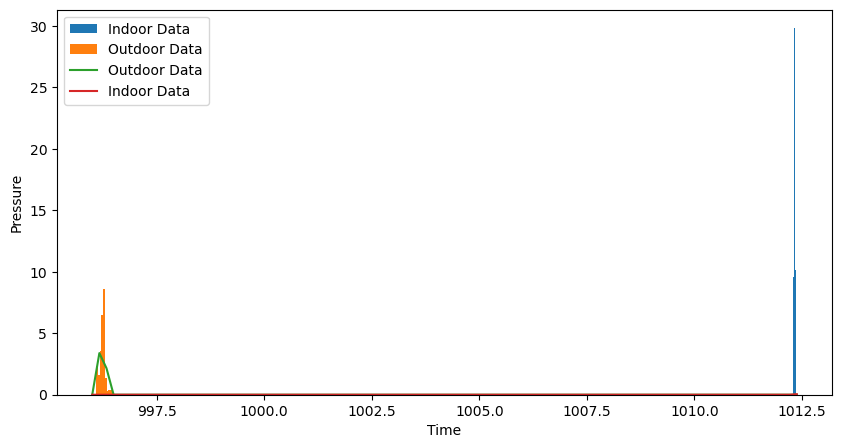

In [28]:
meanP = indoorData['Pressure'].mean()
stdP = indoorData['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Pressure')
ax1.hist(indoorData['Pressure'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['Pressure'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(996,1012.38,100), norm.pdf(np.linspace(996,1012.38,100),meanPo,stdPo), label = 'Outdoor Data');
ax1.plot(np.linspace(996,1012.38,100), norm.pdf(np.linspace(996,1012.38,100),meanP,stdP), label = 'Indoor Data');
ax1.legend();

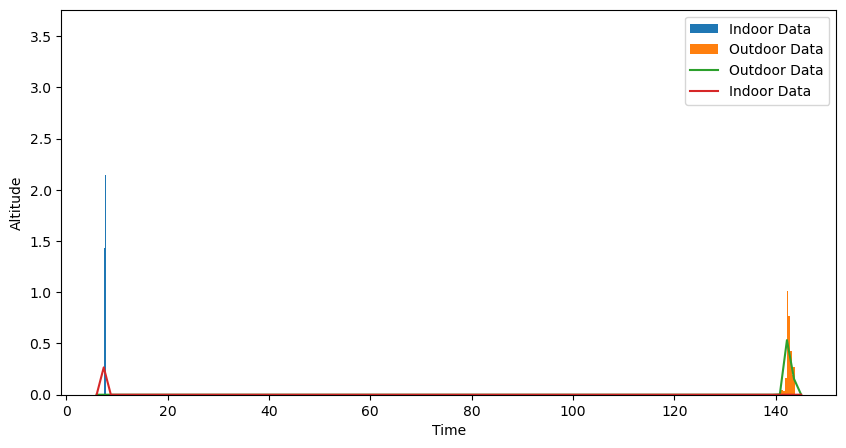

In [29]:
meanA = indoorData['Altitude'].mean()
stdA = indoorData['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Altitude')
ax1.hist(indoorData['Altitude'],density = True, label = 'Indoor Data');
ax1.hist(goodOutdoorData['Altitude'],density = True, label = 'Outdoor Data');
ax1.plot(np.linspace(6,145,100), norm.pdf(np.linspace(6,145,100),meanAo,stdAo), label = 'Outdoor Data');
ax1.plot(np.linspace(6,145,100), norm.pdf(np.linspace(6,145,100),meanA,stdA), label = 'Indoor Data');
ax1.legend();

Data Comparisons:

In [30]:
meanPM1 = indoorData['PM 1.0'].mean()
stdPM1 = indoorData['PM 1.0'].std()

mean1o = goodOutdoorData['PM 1.0'].mean()
std1o = goodOutdoorData['PM 1.0'].std() 

print('Mean PM 1.0(Indoor) = ', meanPM1)
print('Mean PM 1.0(Outdoor) = ', mean1o)

print('STD PM 1.0(Indoor) = ', stdPM1)
print('STD PM 1.0(Outdoor) = ', std1o)

print('Mean Uncertainty PM 1.0(Indoor) = ', (stdPM1 / np.sqrt(252)))
print('Mean Uncertainty PM 1.0(Outdoor) = ', (std1o / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((mean1o - meanPM1)/(stdPM1)))

Mean PM 1.0(Indoor) =  0.6111111111111112
Mean PM 1.0(Outdoor) =  0.5436507936507936
STD PM 1.0(Indoor) =  0.4884681677978085
STD PM 1.0(Outdoor) =  0.49908219057343084
Mean Uncertainty PM 1.0(Indoor) =  0.030770602270580243
Mean Uncertainty PM 1.0(Outdoor) =  0.031439222858062915
Difference in means by indoor stds:  0.13810586217819087


In [31]:
print('Mean PM 2.5(Indoor) = ', meanPM25)
print('Mean PM 2.5(Outdoor) = ', mean25o)

print('STD PM 2.5(Indoor) = ', stdPM25)
print('STD PM 2.5(Outdoor) = ', std25o)

print('Mean Uncertainty PM 2.5(Indoor) = ', (stdPM25 / np.sqrt(252)))
print('Mean Uncertainty PM 2.5(Outdoor) = ', (std25o / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((mean25o - meanPM25)/(stdPM25)))

Mean PM 2.5(Indoor) =  1.3849206349206349
Mean PM 2.5(Outdoor) =  2.1984126984126986
STD PM 2.5(Indoor) =  0.5343301962422945
STD PM 2.5(Outdoor) =  1.6241201909767986
Mean Uncertainty PM 2.5(Indoor) =  0.033659638505939296
Mean Uncertainty PM 2.5(Outdoor) =  0.10230995534769852
Difference in means by indoor stds:  1.522451976723363


In [32]:
print('Mean PM 10(Indoor) = ', meanPM10)
print('Mean PM 10(Outdoor) = ', mean10o)

print('STD PM 10(Indoor) = ', stdPM10)
print('STD PM 10(Outdoor) = ', std10o)

print('Mean Uncertainty PM 10(Indoor) = ', (stdPM10 / np.sqrt(252)))
print('Mean Uncertainty PM 10(Outdoor) = ', (std10o / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((mean10o - meanPM10)/(stdPM10)))

Mean PM 10(Indoor) =  1.8253968253968254
Mean PM 10(Outdoor) =  2.634920634920635
STD PM 10(Indoor) =  0.7094059585412188
STD PM 10(Outdoor) =  1.8079204871066619
Mean Uncertainty PM 10(Indoor) =  0.04468837487827291
Mean Uncertainty PM 10(Outdoor) =  0.1138882856919758
Difference in means by indoor stds:  1.141129137382025


In [33]:
print('Mean Temperature(Indoor) = ', meanT)
print('Mean Temperature(Outdoor) = ', meanTo)

print('STD Temperature(Indoor) = ', stdT)
print('STD Temperature(Outdoor) = ', stdTo)

print('Mean Uncertainty Temperature(Indoor) = ', (stdT / np.sqrt(252)))
print('Mean Uncertainty Temperature(Outdoor) = ', (stdTo / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((meanTo - meanT)/(stdT)))

Mean Temperature(Indoor) =  24.248885633680544
Mean Temperature(Outdoor) =  18.76936166914682
STD Temperature(Indoor) =  0.08459439940759403
STD Temperature(Outdoor) =  1.7359543854806745
Mean Uncertainty Temperature(Indoor) =  0.00532894626527056
Mean Uncertainty Temperature(Outdoor) =  0.10935484741271
Difference in means by indoor stds:  64.77407491401642


In [34]:
print('Mean Gas(Indoor) = ', meanG)
print('Mean Gas(Outdoor) = ', meanGo)

print('STD Gas(Indoor) = ', stdG)
print('STD Gas(Outdoor) = ', stdGo)

print('Mean Uncertainty Gas(Indoor) = ', (stdG / np.sqrt(252)))
print('Mean Uncertainty Gas(Outdoor) = ', (stdGo / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((meanGo - meanG)/(stdG)))

Mean Gas(Indoor) =  52015.69841269841
Mean Gas(Outdoor) =  58506.68253968254
STD Gas(Indoor) =  9580.011654643493
STD Gas(Outdoor) =  8060.771377332459
Mean Uncertainty Gas(Indoor) =  603.4840094115971
Mean Uncertainty Gas(Outdoor) =  507.7808676135543
Difference in means by indoor stds:  0.6775549300963435


In [35]:
print('Mean Humidity(Indoor) = ', meanH)
print('Mean Humidity(Outdoor) = ', meanHo)

print('STD Humidity(Indoor) = ', stdH)
print('STD Humidity(Outdoor) = ', stdHo)

print('Mean Uncertainty Humidity(Indoor) = ', (stdH / np.sqrt(252)))
print('Mean Uncertainty Humidity(Outdoor) = ', (stdHo / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((meanHo - meanH)/(stdH)))

Mean Humidity(Indoor) =  15.819992493381683
Mean Humidity(Outdoor) =  23.22171825304671
STD Humidity(Indoor) =  0.21271648201593482
STD Humidity(Outdoor) =  3.1795412719406473
Mean Uncertainty Humidity(Indoor) =  0.01339987883758826
Mean Uncertainty Humidity(Outdoor) =  0.2002922735433558
Difference in means by indoor stds:  34.796202388823616


In [36]:
print('Mean Pressure(Indoor) = ', meanP)
print('Mean Pressure(Outdoor) = ', meanPo)

print('STD Pressure(Indoor) = ', stdP)
print('STD Pressure(Outdoor) = ', stdPo)

print('Mean Uncertainty Pressure(Indoor) = ', (stdP / np.sqrt(252)))
print('Mean Uncertainty Pressure(Outdoor) = ', (stdPo / np.sqrt(252)))
print('Difference in means by indoor stds: ', np.abs((meanPo - meanP)/(stdP)))

Mean Pressure(Indoor) =  1012.3290812304215
Mean Pressure(Outdoor) =  996.2364284010836
STD Pressure(Indoor) =  0.01417136275361361
STD Pressure(Outdoor) =  0.06556470808411853
Mean Uncertainty Pressure(Indoor) =  0.0008927119424986933
Mean Uncertainty Pressure(Outdoor) =  0.0041301883898362795
Difference in means by indoor stds:  1135.5755342043149


In [37]:
print('Mean Altitude(Indoor) = ', meanA)
print('Mean Altitude(Outdoor) = ', meanAo)

print('STD Alitude(Indoor) = ', stdA)
print('STD Altitude(Outdoor) = ', stdAo)

print('Mean Uncertainty Altitude(Indoor) = ', (stdA/ np.sqrt(252)))
print('Mean Uncertainty Altitude(Outdoor) = ', (stdAo / np.sqrt(252)))
print('Difference in means by indoor stds: ', ((meanAo - meanA)/(stdA)))

Mean Altitude(Indoor) =  7.670101835344513
Mean Altitude(Outdoor) =  142.62241617325418
STD Alitude(Indoor) =  0.11807319004217517
STD Altitude(Outdoor) =  0.5534042127288316
Mean Uncertainty Altitude(Indoor) =  0.007437911841801512
Mean Uncertainty Altitude(Outdoor) =  0.034861188604189845
Difference in means by indoor stds:  1142.954757889622


After completing the data and graph comparisons, we can see that indoor and outdoor differ greatly. As we travel outdoor general weather conditions differ as expected, but the PM ratings also slightly differ. The difference is not by much but is noticeable based on the fact we travel from an underground basement to a ground level patio.

COMPARING SENSORS:

In [38]:
local_string = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\20230222-144631_aq_pth.csv'
indoorDataOther = pd.read_csv(local_string)
indoorDataOther

,Local Time,Unix Time,PM1.0,PM2.5,PM10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 10
0,Wed Feb 22 14:46:31 2023,1.677106e+09,0,0,0,21.863398,39556,21.540199,997.355180,133.183727,NaN
1,Wed Feb 22 14:46:33 2023,1.677106e+09,0,0,0,21.880586,4661,21.541270,997.355481,133.181191,NaN
2,Wed Feb 22 14:46:34 2023,1.677106e+09,0,0,0,21.916328,6986,21.523080,997.351429,133.215359,NaN
3,Wed Feb 22 14:46:35 2023,1.677106e+09,0,0,0,21.951484,8783,21.453833,997.337859,133.329798,NaN
4,Wed Feb 22 14:46:36 2023,1.677106e+09,0,0,0,21.982344,10167,21.379250,997.331063,133.387105,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,Wed Feb 22 14:52:24 2023,1.677106e+09,0,0,0,22.228242,63639,20.257073,997.374379,133.021829,NaN
296,Wed Feb 22 14:52:25 2023,1.677106e+09,0,0,0,22.228242,63776,20.252019,997.362379,133.123023,NaN
297,Wed Feb 22 14:52:26 2023,1.677106e+09,0,0,0,22.229219,63822,20.257131,997.360524,133.138662,NaN
298,Wed Feb 22 14:52:27 2023,1.677106e+09,0,0,0,22.229219,63776,20.257131,997.363953,133.109749,NaN


In [39]:
local_string = r'C:\Users\scday\OneDrive\Documents\GitHub\E11-Scott-Laura\20230215-160202_aq_pth.csv'
outdoorDataOther = pd.read_csv(local_string)
outdoorDataOther

,Local Time,Unix Time,PM1.0,PM2.5,PM10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 10
0,Wed Feb 15 16:02:02 2023,1.676506e+09,0,0,0,23.581172,86055,16.667302,1012.332852,7.638687,NaN
1,Wed Feb 15 16:02:03 2023,1.676506e+09,0,0,0,23.598555,14029,16.619027,1012.332019,7.645627,NaN
2,Wed Feb 15 16:02:04 2023,1.676506e+09,0,0,0,23.636445,19011,16.547235,1012.330295,7.659992,NaN
3,Wed Feb 15 16:02:06 2023,1.676506e+09,0,0,0,23.673164,21999,16.465602,1012.338683,7.590104,NaN
4,Wed Feb 15 16:02:07 2023,1.676506e+09,0,0,0,23.705781,25107,16.383811,1012.338650,7.590374,NaN
...,...,...,...,...,...,...,...,...,...,...,...
595,Wed Feb 15 16:13:52 2023,1.676506e+09,1,3,3,19.945039,14507,20.546370,1009.641260,30.088644,NaN
596,Wed Feb 15 16:13:53 2023,1.676506e+09,1,3,3,19.996992,15895,20.584735,1009.608316,30.363719,NaN
597,Wed Feb 15 16:13:54 2023,1.676506e+09,1,3,3,20.049531,14769,20.608017,1009.589987,30.516769,NaN
598,Wed Feb 15 16:13:56 2023,1.676506e+09,1,3,3,20.105391,15792,20.626457,1009.570235,30.681702,NaN


In [40]:
time_mask1 = outdoorDataOther['Unix Time']>1.676506137e+09
goodOutdoorDataOther = outdoorDataOther[time_mask1]
goodOutdoorDataOther

,Local Time,Unix Time,PM1.0,PM2.5,PM10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 10
348,Wed Feb 15 16:08:58 2023,1.676506e+09,5,9,10,16.797969,57701,21.248407,1010.683561,21.389306,NaN
349,Wed Feb 15 16:08:59 2023,1.676506e+09,5,9,10,16.797578,57739,21.253425,1010.682919,21.394661,NaN
350,Wed Feb 15 16:09:00 2023,1.676506e+09,5,9,10,16.792500,57514,21.303549,1010.700084,21.251459,NaN
351,Wed Feb 15 16:09:01 2023,1.676506e+09,5,8,9,16.785469,57701,21.343487,1010.729344,21.007351,NaN
352,Wed Feb 15 16:09:02 2023,1.676506e+09,5,8,9,16.780000,57814,21.317942,1010.728860,21.011392,NaN
...,...,...,...,...,...,...,...,...,...,...,...
595,Wed Feb 15 16:13:52 2023,1.676506e+09,1,3,3,19.945039,14507,20.546370,1009.641260,30.088644,NaN
596,Wed Feb 15 16:13:53 2023,1.676506e+09,1,3,3,19.996992,15895,20.584735,1009.608316,30.363719,NaN
597,Wed Feb 15 16:13:54 2023,1.676506e+09,1,3,3,20.049531,14769,20.608017,1009.589987,30.516769,NaN
598,Wed Feb 15 16:13:56 2023,1.676506e+09,1,3,3,20.105391,15792,20.626457,1009.570235,30.681702,NaN


In [41]:
time_mask1 = indoorDataOther['Unix Time']<1.677106292e+09
goodIndoorDataOther = indoorDataOther[time_mask1]
goodIndoorDataOther

,Local Time,Unix Time,PM1.0,PM2.5,PM10,Temperature,Gas,Humidity,Pressure,Altitude,Unnamed: 10
0,Wed Feb 22 14:46:31 2023,1.677106e+09,0,0,0,21.863398,39556,21.540199,997.355180,133.183727,NaN
1,Wed Feb 22 14:46:33 2023,1.677106e+09,0,0,0,21.880586,4661,21.541270,997.355481,133.181191,NaN
2,Wed Feb 22 14:46:34 2023,1.677106e+09,0,0,0,21.916328,6986,21.523080,997.351429,133.215359,NaN
3,Wed Feb 22 14:46:35 2023,1.677106e+09,0,0,0,21.951484,8783,21.453833,997.337859,133.329798,NaN
4,Wed Feb 22 14:46:36 2023,1.677106e+09,0,0,0,21.982344,10167,21.379250,997.331063,133.387105,NaN
...,...,...,...,...,...,...,...,...,...,...,...
247,Wed Feb 22 14:51:26 2023,1.677106e+09,0,0,0,22.220430,57852,20.342558,997.409785,132.723254,NaN
248,Wed Feb 22 14:51:28 2023,1.677106e+09,0,0,0,22.221406,58425,20.393202,997.411360,132.709980,NaN
249,Wed Feb 22 14:51:29 2023,1.677106e+09,0,0,0,22.221992,59129,20.464094,997.410590,132.716471,NaN
250,Wed Feb 22 14:51:30 2023,1.677106e+09,0,0,0,22.223359,59567,20.530008,997.416222,132.668977,NaN


Indoor Data Comparison Plots

C:\Users\scday\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


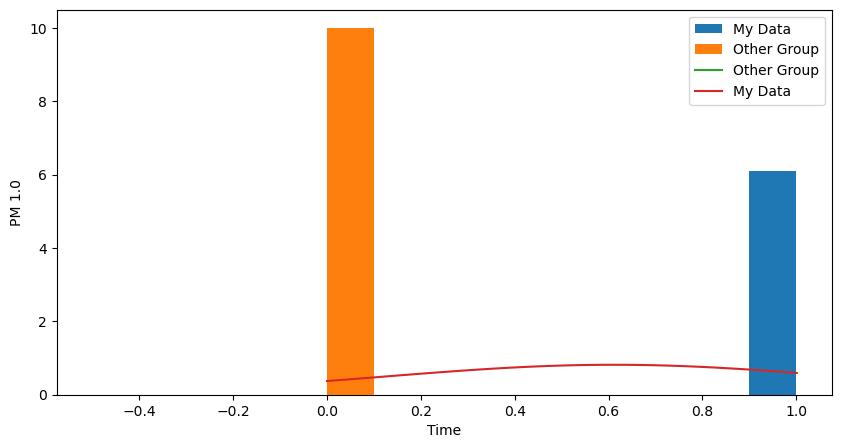

In [42]:
meanPM1 = indoorData['PM 1.0'].mean()
stdPM1 = indoorData['PM 1.0'].std()
meanOPM1 = goodIndoorDataOther['PM1.0'].mean()
stdOPM1 = goodIndoorDataOther['PM1.0'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 1.0')
ax1.hist(indoorData['PM 1.0'],density = True,label = 'My Data');
ax1.hist(goodIndoorDataOther['PM1.0'],density = True, label = 'Other Group');
ax1.plot(np.linspace(-1.001,1.001,100), norm.pdf(np.linspace(-1.001,1.001,100),meanOPM1,stdOPM1), label = 'Other Group');
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),meanPM1,stdPM1), label = 'My Data');
ax1.legend();

C:\Users\scday\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2085: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


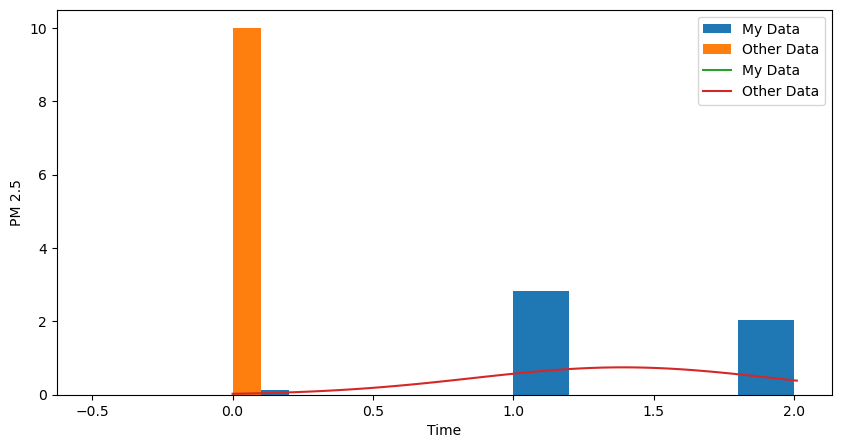

In [43]:
meanPM25 = indoorData['PM 2.5'].mean()
stdPM25 = indoorData['PM 2.5'].std()
meanOPM25 = goodIndoorDataOther['PM2.5'].mean()
stdOPM25 = goodIndoorDataOther['PM2.5'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 2.5')
ax1.hist(indoorData['PM 2.5'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['PM2.5'],density = True,label = 'Other Data');
ax1.plot(np.linspace(0,2.01,100), norm.pdf(np.linspace(0,2.001,100),meanOPM25,stdOPM25),label = 'My Data');
ax1.plot(np.linspace(0,2.01,100), norm.pdf(np.linspace(0,2.001,100),meanPM25,stdPM25),label='Other Data');
ax1.legend();

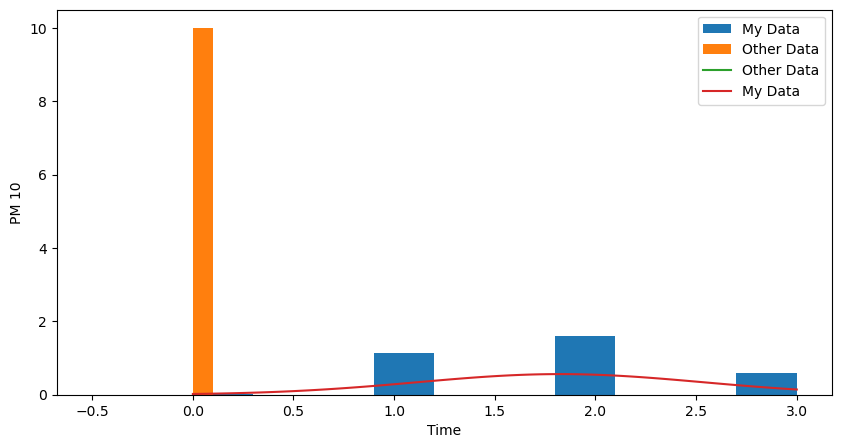

In [44]:
meanPM10 = indoorData['PM 10'].mean()
stdPM10 = indoorData['PM 10'].std()
meanOPM10 = goodIndoorDataOther['PM10'].mean()
stdOPM10 = goodIndoorDataOther['PM10'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 10')
ax1.hist(indoorData['PM 10'],density = True,label = 'My Data');
ax1.hist(goodIndoorDataOther['PM10'],density = True,label='Other Data');
ax1.plot(np.linspace(0,3.001,100), norm.pdf(np.linspace(0,3.001,100),meanOPM10,stdOPM10),label='Other Data');
ax1.plot(np.linspace(0,3.001,100), norm.pdf(np.linspace(0,3.001,100),meanPM10,stdPM10),label='My Data');
ax1.legend();

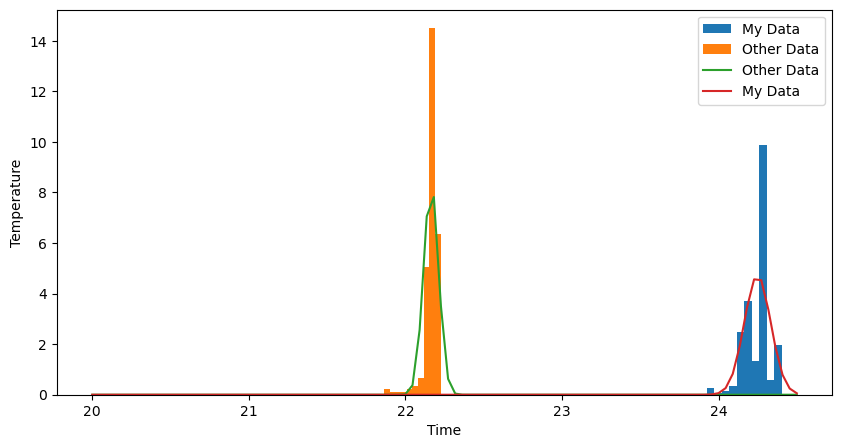

In [45]:
meanT = indoorData['Temperature'].mean()
stdT = indoorData['Temperature'].std()
meanOT = goodIndoorDataOther['Temperature'].mean()
stdOT = goodIndoorDataOther['Temperature'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Temperature')
ax1.hist(indoorData['Temperature'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['Temperature'],density = True,label ='Other Data');
ax1.plot(np.linspace(20,24.5,100), norm.pdf(np.linspace(20,24.5,100),meanOT,stdOT),label='Other Data');
ax1.plot(np.linspace(20,24.5,100), norm.pdf(np.linspace(20,24.5,100),meanT,stdT),label='My Data');
ax1.legend()

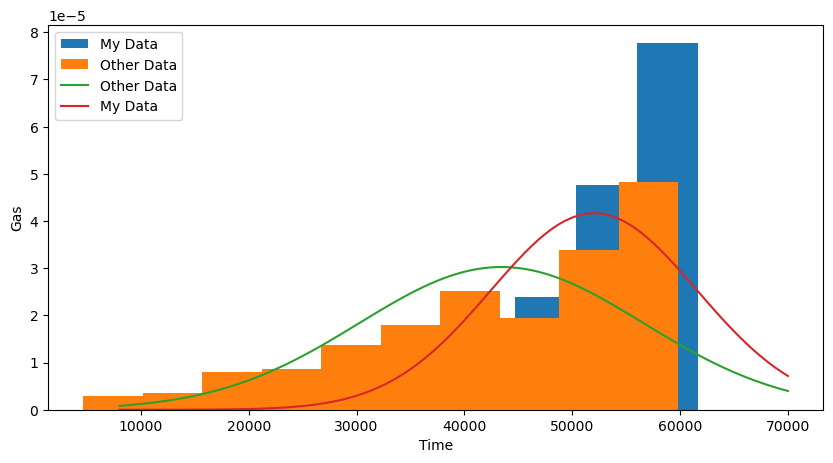

In [46]:
meanG = indoorData['Gas'].mean()
stdG = indoorData['Gas'].std()
meanOG = goodIndoorDataOther['Gas'].mean()
stdOG = goodIndoorDataOther['Gas'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Gas')
ax1.hist(indoorData['Gas'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['Gas'],density = True,label='Other Data');
ax1.plot(np.linspace(8000,70000,100), norm.pdf(np.linspace(8000,70000,100),meanOG,stdOG),label='Other Data');
ax1.plot(np.linspace(8000,70000,100), norm.pdf(np.linspace(8000,70000,100),meanG,stdG),label='My Data');
ax1.legend()

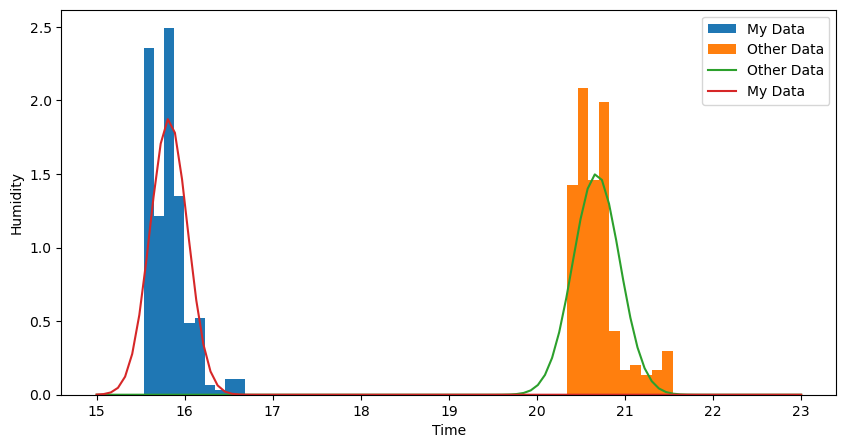

In [47]:
meanH = indoorData['Humidity'].mean()
stdH = indoorData['Humidity'].std()
meanOH = goodIndoorDataOther['Humidity'].mean()
stdOH = goodIndoorDataOther['Humidity'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Humidity')
ax1.hist(indoorData['Humidity'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['Humidity'],density = True,label='Other Data');
ax1.plot(np.linspace(15,23,100), norm.pdf(np.linspace(15,23,100),meanOH,stdOH),label='Other Data');
ax1.plot(np.linspace(15,23,100), norm.pdf(np.linspace(15,23,100),meanH,stdH),label='My Data');
ax1.legend();

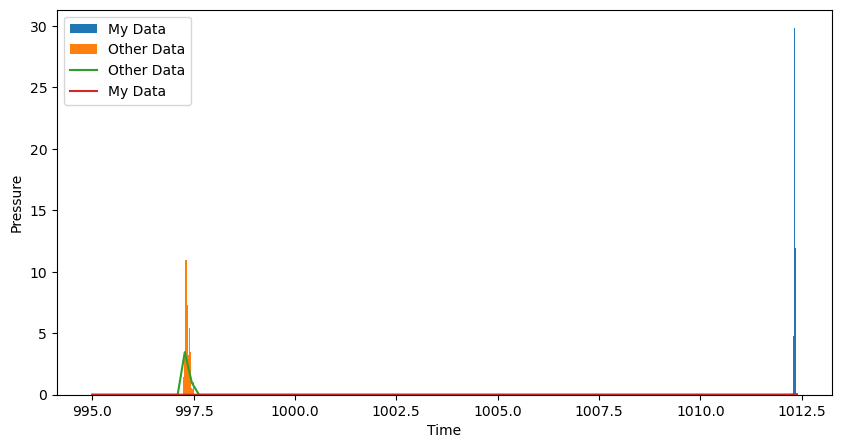

In [48]:
meanP = indoorData['Pressure'].mean()
stdP = indoorData['Pressure'].std() 
meanOP = goodIndoorDataOther['Pressure'].mean()
stdOP = goodIndoorDataOther['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Pressure')
ax1.hist(indoorData['Pressure'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['Pressure'],density = True,label='Other Data');
ax1.plot(np.linspace(995,1012.38,100), norm.pdf(np.linspace(995,1012.38,100),meanOP,stdOP),label='Other Data');
ax1.plot(np.linspace(995,1012.38,100), norm.pdf(np.linspace(995,1012.38,100),meanP,stdP),label='My Data');
ax1.legend();

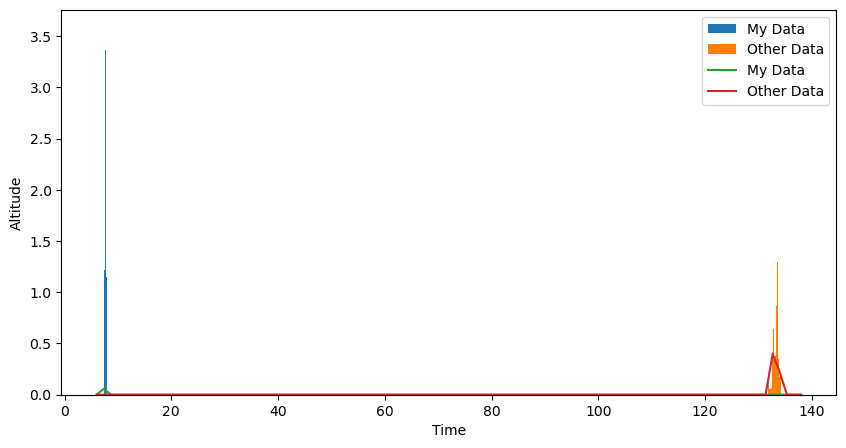

In [49]:
meanA = indoorData['Altitude'].mean()
stdA = indoorData['Altitude'].std() 
meanOA = goodIndoorDataOther['Altitude'].mean()
stdOA = goodIndoorDataOther['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Altitude')
ax1.hist(indoorData['Altitude'],density = True,label='My Data');
ax1.hist(goodIndoorDataOther['Altitude'],density = True,label='Other Data');
ax1.plot(np.linspace(6,138,100), norm.pdf(np.linspace(6,138,100),meanA,stdA),label='My Data');
ax1.plot(np.linspace(6,138,100), norm.pdf(np.linspace(6,138,100),meanOA,stdOA),label='Other Data');
ax1.legend();

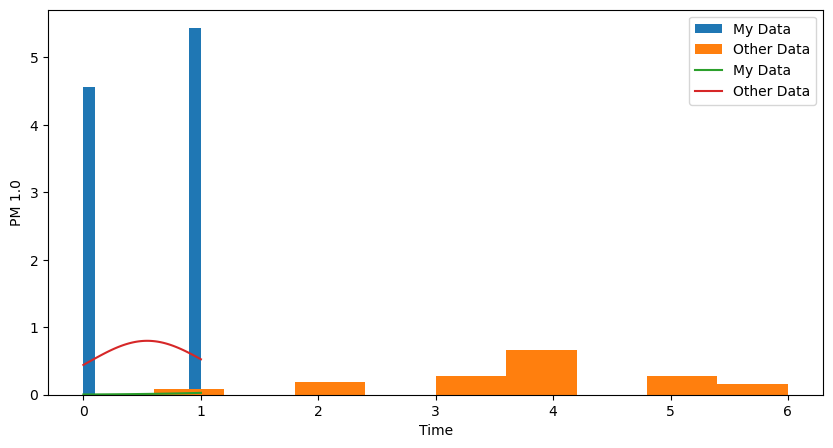

In [50]:
mean1o = goodOutdoorData['PM 1.0'].mean()
std1o = goodOutdoorData['PM 1.0'].std() 
meanO1o = goodOutdoorDataOther['PM1.0'].mean()
stdO1o = goodOutdoorDataOther['PM1.0'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.ylabel('PM 1.0')
plt.xlabel('Time')
ax1.hist(goodOutdoorData['PM 1.0'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['PM1.0'],density = True,label='Other Data');
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),meanO1o,stdO1o),label='My Data');
ax1.plot(np.linspace(0,1.001,100), norm.pdf(np.linspace(0,1.001,100),mean1o,std1o),label='Other Data');
ax1.legend();

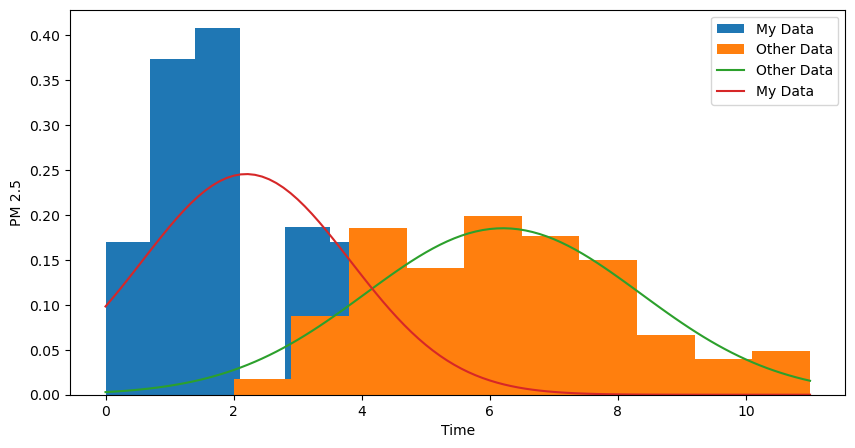

In [51]:
mean25o = goodOutdoorData['PM 2.5'].mean()
std25o = goodOutdoorData['PM 2.5'].std() 
meanO25o = goodOutdoorDataOther['PM2.5'].mean()
stdO25o = goodOutdoorDataOther['PM2.5'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 2.5')
ax1.hist(goodOutdoorData['PM 2.5'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['PM2.5'],density = True,label='Other Data');
ax1.plot(np.linspace(0,11,100), norm.pdf(np.linspace(0,11,100),meanO25o,stdO25o),label='Other Data');
ax1.plot(np.linspace(0,11,100), norm.pdf(np.linspace(0,11,100),mean25o,std25o),label='My Data');
ax1.legend();

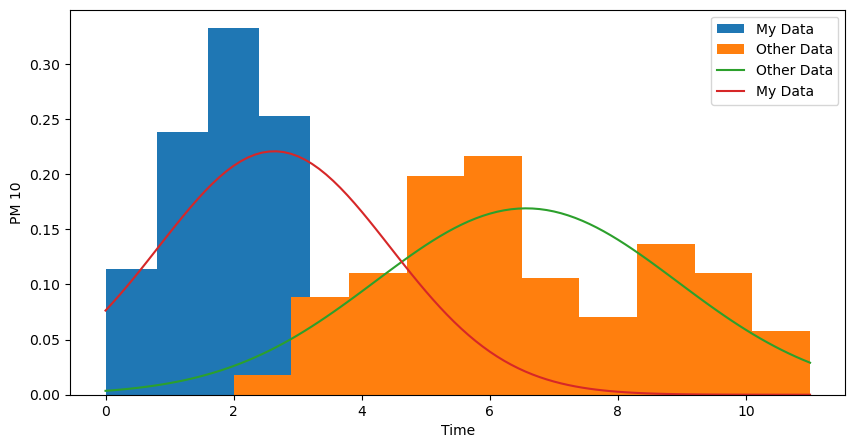

In [52]:
mean10o = goodOutdoorData['PM 10'].mean()
std10o = goodOutdoorData['PM 10'].std() 
meanO10o = goodOutdoorDataOther['PM10'].mean()
stdO10o = goodOutdoorDataOther['PM10'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('PM 10')
ax1.hist(goodOutdoorData['PM 10'],density = True,label="My Data");
ax1.hist(goodOutdoorDataOther['PM10'],density = True,label="Other Data");
ax1.plot(np.linspace(0,11,100), norm.pdf(np.linspace(0,11,100),meanO10o,stdO10o),label='Other Data');
ax1.plot(np.linspace(0,11,100), norm.pdf(np.linspace(0,11,100),mean10o,std10o),label='My Data');
ax1.legend();

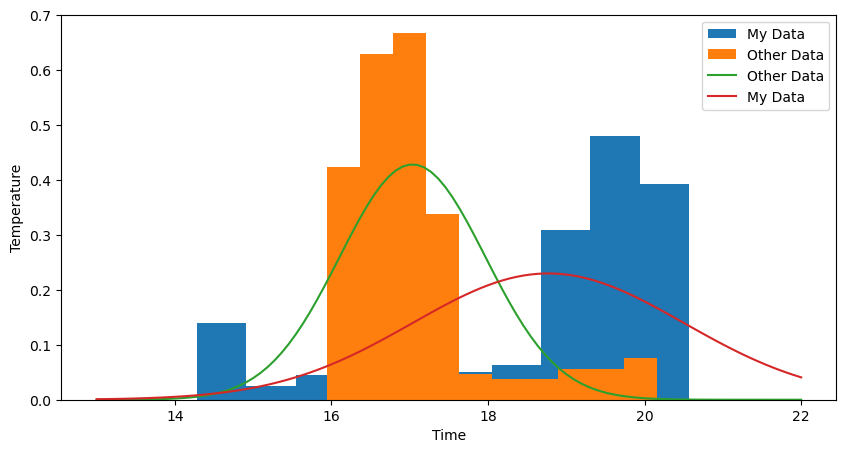

In [53]:
meanTo = goodOutdoorData['Temperature'].mean()
stdTo = goodOutdoorData['Temperature'].std() 
meanOTo = goodOutdoorDataOther['Temperature'].mean()
stdOTo = goodOutdoorDataOther['Temperature'].std()
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Temperature')
ax1.hist(goodOutdoorData['Temperature'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['Temperature'],density = True,label='Other Data');
ax1.plot(np.linspace(13,22,100), norm.pdf(np.linspace(13,22,100),meanOTo,stdOTo),label='Other Data');
ax1.plot(np.linspace(13,22,100), norm.pdf(np.linspace(13,22,100),meanTo,stdTo),label='My Data');
ax1.legend();

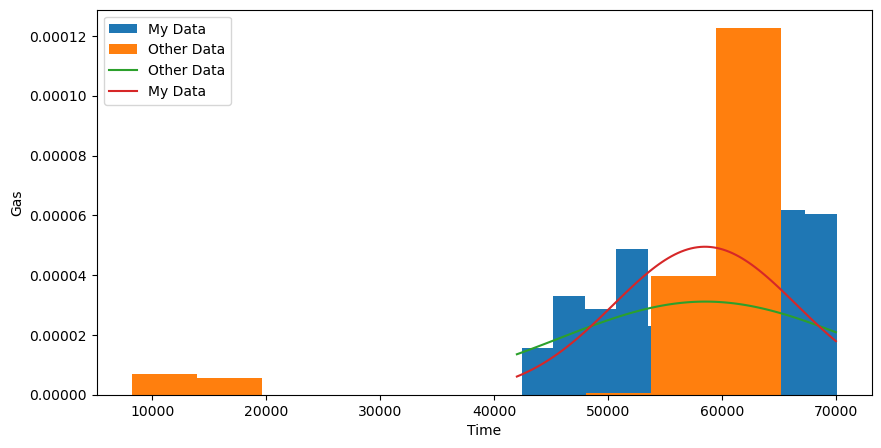

In [54]:
meanGo = goodOutdoorData['Gas'].mean()
stdGo = goodOutdoorData['Gas'].std() 
meanOGo = goodOutdoorDataOther['Gas'].mean()
stdOGo = goodOutdoorDataOther['Gas'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Gas')
ax1.hist(goodOutdoorData['Gas'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['Gas'],density = True,label='Other Data');
ax1.plot(np.linspace(42000,70000.01,100), norm.pdf(np.linspace(42000,70000.1,100),meanOGo,stdOGo),label='Other Data');
ax1.plot(np.linspace(42000,70000.01,100), norm.pdf(np.linspace(42000,70000.1,100),meanGo,stdGo),label='My Data');
ax1.legend();

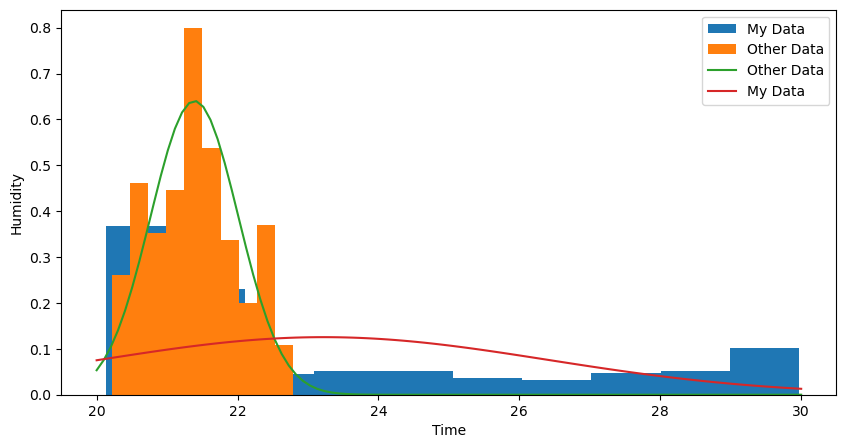

In [55]:
meanHo = goodOutdoorData['Humidity'].mean()
stdHo = goodOutdoorData['Humidity'].std() 
meanOHo = goodOutdoorDataOther['Humidity'].mean()
stdOHo = goodOutdoorDataOther['Humidity'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.ylabel('Humidity')
plt.xlabel('Time')
ax1.hist(goodOutdoorData['Humidity'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['Humidity'],density = True,label='Other Data');
ax1.plot(np.linspace(20,30.001,100), norm.pdf(np.linspace(20,30.001,100),meanOHo,stdOHo),label='Other Data');
ax1.plot(np.linspace(20,30.001,100), norm.pdf(np.linspace(20,30.001,100),meanHo,stdHo),label='My Data');
ax1.legend();

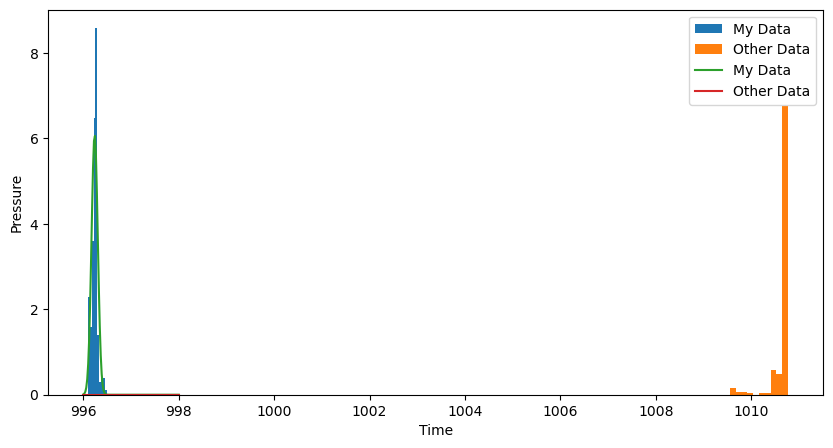

In [56]:
meanPo = goodOutdoorData['Pressure'].mean()
stdPo = goodOutdoorData['Pressure'].std() 
meanOPo = goodOutdoorDataOther['Pressure'].mean()
stdOPo = goodOutdoorDataOther['Pressure'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Pressure')
ax1.hist(goodOutdoorData['Pressure'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['Pressure'],density = True,label='Other Data');
ax1.plot(np.linspace(996,998,100), norm.pdf(np.linspace(996,998,100),meanPo,stdPo),label='My Data');
ax1.plot(np.linspace(996,998,100), norm.pdf(np.linspace(996,998,100),meanOPo,stdOPo),label='Other Data');
ax1.legend();

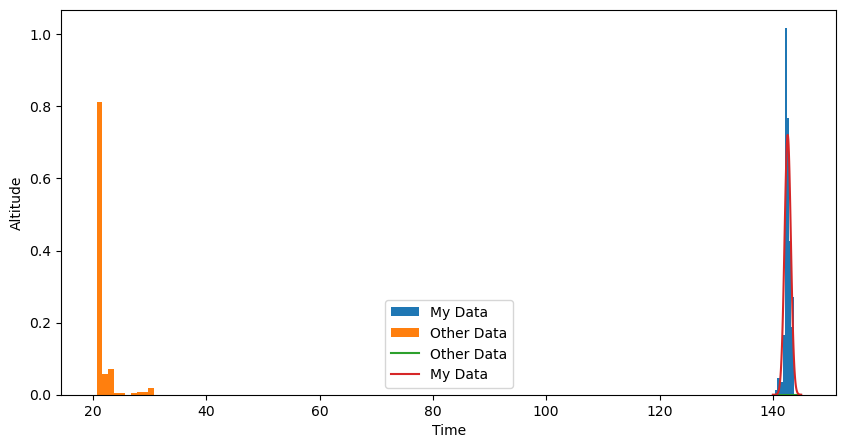

In [57]:
meanAo = goodOutdoorData['Altitude'].mean()
stdAo = goodOutdoorData['Altitude'].std() 
meanOAo = goodOutdoorDataOther['Altitude'].mean()
stdOAo = goodOutdoorDataOther['Altitude'].std() 
plt.ion()
fig1 = plt.figure(1, figsize=(10,5))
ax1 = fig1.add_subplot()
plt.xlabel('Time')
plt.ylabel('Altitude')
ax1.hist(goodOutdoorData['Altitude'],density = True,label='My Data');
ax1.hist(goodOutdoorDataOther['Altitude'],density = True,label='Other Data');
ax1.plot(np.linspace(140,145,100), norm.pdf(np.linspace(140,145,100),meanOAo,stdOAo),label='Other Data');
ax1.plot(np.linspace(140,145,100), norm.pdf(np.linspace(140,145,100),meanAo,stdAo),label='My Data');
ax1.legend();

In [59]:
print('Mean PM 1.0(My Group) = ', meanPM1)
print('Mean PM 1.0(Other) = ', meanOPM1)

print('STD PM 1.0(My Group) = ', stdPM1)
print('STD PM 1.0(Other) = ', stdOPM1)

print('Mean Uncertainty PM 1.0(My Group) = ', (stdPM1 / np.sqrt(252)))
print('Mean Uncertainty PM 1.0(Other) = ', (std1o / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOPM1 - meanPM1)/(stdPM1)))

Mean PM 1.0(My Group) =  0.6111111111111112
Mean PM 1.0(Other) =  0.0
STD PM 1.0(My Group) =  0.4884681677978085
STD PM 1.0(Other) =  0.0
Mean Uncertainty PM 1.0(My Group) =  0.030770602270580243
Mean Uncertainty PM 1.0(Other) =  0.031439222858062915
Difference in means by my stds:  1.251076633849492


In [60]:
print('Mean PM 2.5(My Group) = ', meanPM25)
print('Mean PM 2.5(Other) = ', meanOPM25)

print('STD PM 2.5(My Group) = ', stdPM25)
print('STD PM 2.5(Other) = ', stdOPM25)

print('Mean Uncertainty PM 2.5(My Group) = ', (stdPM25 / np.sqrt(252)))
print('Mean Uncertainty PM 2.5(Other) = ', (stdPM25 / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOPM25 - meanPM25)/(stdPM25)))

Mean PM 2.5(My Group) =  1.3849206349206349
Mean PM 2.5(Other) =  0.0
STD PM 2.5(My Group) =  0.5343301962422945
STD PM 2.5(Other) =  0.0
Mean Uncertainty PM 2.5(My Group) =  0.033659638505939296
Mean Uncertainty PM 2.5(Other) =  0.033659638505939296
Difference in means by my stds:  2.5918816579339197


In [61]:
print('Mean PM 10(My Group) = ', meanPM10)
print('Mean PM 10(Other) = ', meanOPM10)

print('STD PM 2.5(My Group) = ', stdPM10)
print('STD PM 2.5(Other) = ', stdOPM10)

print('Mean Uncertainty PM 2.5(My Group) = ', (stdPM10 / np.sqrt(252)))
print('Mean Uncertainty PM 2.5(Other) = ', (stdPM10 / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOPM10 - meanPM10)/(stdPM10)))

Mean PM 10(My Group) =  1.8253968253968254
Mean PM 10(Other) =  0.0
STD PM 2.5(My Group) =  0.7094059585412188
STD PM 2.5(Other) =  0.0
Mean Uncertainty PM 2.5(My Group) =  0.04468837487827291
Mean Uncertainty PM 2.5(Other) =  0.04468837487827291
Difference in means by my stds:  2.5731343293908404


In [62]:
print('Mean Temperature(My Group) = ', meanT)
print('Mean Temperature(Other) = ', meanOT)

print('STD Temperature(My Group) = ', stdT)
print('STD Temperature(Other) = ', stdOT)

print('Mean Uncertainty Temperature(My Group) = ', (stdT / np.sqrt(252)))
print('Mean Uncertainty Temperature(Other) = ', (stdOT / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOT - meanT)/(stdT)))

Mean Temperature(My Group) =  24.248885633680544
Mean Temperature(Other) =  22.164227740575388
STD Temperature(Indoor) =  0.08459439940759403
STD Temperature(Outdoor) =  0.047654509915813104
Mean Uncertainty Temperature(Indoor) =  0.00532894626527056
Mean Uncertainty Temperature(Outdoor) =  0.003001951954473882
Difference in means by indoor stds:  24.64297764040886


In [64]:
print('Mean Gas(My Group) = ', meanG)
print('Mean Gas(Other) = ', meanOG)

print('STD Gas(My Group) = ', stdG)
print('STD Gas(Other) = ', stdOG)

print('Mean Uncertainty Gas(My Group) = ', (stdG / np.sqrt(252)))
print('Mean Uncertainty Gas(Other) = ', (stdOG / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOG - meanG)/(stdG)))

Mean Gas(My Group) =  52015.69841269841
Mean Gas(Other) =  43426.4246031746
STD Gas(My Group) =  9580.011654643493
STD Gas(Other) =  13189.738081540178
Mean Uncertainty Gas(My Group) =  603.4840094115971
Mean Uncertainty Gas(Other) =  830.8754005198448
Difference in means by my stds:  0.8965828142140655


In [65]:
print('Mean Humidity(My Group) = ', meanH)
print('Mean Humidity(Other) = ', meanOH)

print('STD Humidity(My Group) = ', stdH)
print('STD Humidity(Other) = ', stdOH)

print('Mean Uncertainty Humidity(My Group) = ', (stdH / np.sqrt(252)))
print('Mean Uncertainty Humidity(Other) = ', (stdOH / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOH - meanH)/(stdH)))

Mean Humidity(My Group) =  15.819992493381683
Mean Humidity(Other) =  20.674749263257347
STD Humidity(My Group) =  0.21271648201593482
STD Humidity(Other) =  0.26587050004806045
Mean Uncertainty Humidity(My Group) =  0.01339987883758826
Mean Uncertainty Humidity(Other) =  0.016748267239894147
Difference in means by my stds:  22.822663875721624


In [66]:
print('Mean Pressure(My Group) = ', meanP)
print('Mean Pressure(Other) = ', meanOP)

print('STD Pressure(My Group) = ', stdP)
print('STD Pressure(Other) = ', stdOP)

print('Mean Uncertainty Pressure(My Group) = ', (stdP / np.sqrt(252)))
print('Mean Uncertainty Pressure(Other) = ', (stdOP / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOP - meanP)/(stdP)))

Mean Pressure(My Group) =  1012.3290812304215
Mean Pressure(Other) =  997.3487203600405
STD Pressure(My Group) =  0.01417136275361361
STD Pressure(Other) =  0.05413974842403147
Mean Uncertainty Pressure(My Group) =  0.0008927119424986933
Mean Uncertainty Pressure(Other) =  0.0034104835803235325
Difference in means by my stds:  1057.0868257931716


In [67]:
print('Mean Altitude(My Group) = ', meanA)
print('Mean Altitude(Other) = ', meanOA)

print('STD Altitude(My Group) = ', stdA)
print('STD Altitude(Other) = ', stdOA)

print('Mean Uncertainty Altitude(My Group) = ', (stdA / np.sqrt(252)))
print('Mean Uncertainty Altitude(Other) = ', (stdOA / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOA - meanA)/(stdA)))

Mean Altitude(My Group) =  7.670101835344513
Mean Altitude(Other) =  133.23821316462698
STD Altitude(My Group) =  0.11807319004217517
STD Altitude(Other) =  0.45655289440732966
Mean Uncertainty Altitude(My Group) =  0.007437911841801512
Mean Uncertainty Altitude(Other) =  0.02876012902258395
Difference in means by my stds:  1063.4769102488901


In [68]:
print('Mean Outdoor PM 1.0(My Group) = ', mean1o)
print('Mean Outdoor PM 1.0(Other) = ', meanO1o)

print('STD Outdoor PM 1.0(My Group) = ', std1o)
print('STD Outdoor PM 1.0(Other) = ', stdO1o)

print('Mean Uncertainty Outdoor PM 1.0(My Group) = ', (std1o / np.sqrt(252)))
print('Mean Uncertainty Outdoor PM 1.0(Other) = ', (stdO1o / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanO1o - mean1o)/(std1o)))

Mean Outdoor PM 1.0(My Group) =  0.5436507936507936
Mean Outdoor PM 1.0(Other) =  3.8095238095238093
STD Outdoor PM 1.0(My Group) =  0.49908219057343084
STD Outdoor PM 1.0(Other) =  1.2762887289910434
Mean Uncertainty Outdoor PM 1.0(My Group) =  0.031439222858062915
Mean Uncertainty Outdoor PM 1.0(Other) =  0.08039863281011936
Difference in means by my stds:  6.543757877075564


In [70]:
print('Mean Outdoor PM 2.5(My Group) = ', mean25o)
print('Mean Outdoor PM 2.5(Other) = ', meanO25o)

print('STD Outdoor PM 2.5(My Group) = ', std25o)
print('STD Outdoor PM 2.5(Other) = ', stdO25o)

print('Mean Uncertainty Outdoor PM 2.5(My Group) = ', (std25o / np.sqrt(252)))
print('Mean Uncertainty Outdoor PM 2.5(Other) = ', (stdO25o / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanO25o - mean25o)/(std25o)))

Mean Outdoor PM 2.5(My Group) =  2.1984126984126986
Mean Outdoor PM 2.5(Other) =  6.2063492063492065
STD Outdoor PM 2.5(My Group) =  1.6241201909767986
STD Outdoor PM 2.5(Other) =  2.1527984578864436
Mean Uncertainty Outdoor PM 2.5(My Group) =  0.10230995534769852
Mean Uncertainty Outdoor PM 2.5(Other) =  0.1356135557716878
Difference in means by my stds:  2.4677585625765817


In [72]:
print('Mean Outdoor PM 10(My Group) = ', mean10o)
print('Mean Outdoor PM 10(Other) = ', meanO10o)

print('STD Outdoor PM 10(My Group) = ', std10o)
print('STD Outdoor PM 10(Other) = ', stdO10o)

print('Mean Uncertainty Outdoor PM 10(My Group) = ', (std10o / np.sqrt(252)))
print('Mean Uncertainty Outdoor PM 10(Other) = ', (stdO10o / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanO10o - mean10o)/(std10o)))

Mean Outdoor PM 10(My Group) =  2.634920634920635
Mean Outdoor PM 10(Other) =  6.567460317460317
STD Outdoor PM 10(My Group) =  1.8079204871066619
STD Outdoor PM 10(Other) =  2.3615893549234044
Mean Uncertainty Outdoor PM 10(My Group) =  0.1138882856919758
Mean Uncertainty Outdoor PM 10(Other) =  0.14876614599963756
Difference in means by my stds:  2.175172918601743


In [73]:
print('Mean Outdoor Temperature(My Group) = ', meanTo)
print('Mean Outdoor Temperature(Other) = ', meanOTo)

print('STD Outdoor Temperature(My Group) = ', stdTo)
print('STD Outdoor Temperature(Other) = ', stdOTo)

print('Mean Uncertainty Outdoor Temperature(My Group) = ', (stdTo / np.sqrt(252)))
print('Mean Uncertainty Outdoor Temperature(Other) = ', (stdOTo / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOTo - meanTo)/(stdTo)))

Mean Outdoor Temperature(My Group) =  18.76936166914682
Mean Outdoor Temperature(Other) =  17.03533079117065
STD Outdoor Temperature(My Group) =  1.7359543854806745
STD Outdoor Temperature(Other) =  0.9316814924918179
Mean Uncertainty Outdoor Temperature(My Group) =  0.10935484741271
Mean Uncertainty Outdoor Temperature(Other) =  0.058690417387020036
Difference in means by my stds:  0.998891959650212


In [74]:
print('Mean Outdoor Gas(My Group) = ', meanGo)
print('Mean Outdoor Gas(Other) = ', meanOGo)

print('STD Outdoor Gas(My Group) = ', stdGo)
print('STD Outdoor Gas(Other) = ', stdOGo)

print('Mean Uncertainty Outdoor Gas(My Group) = ', (stdGo / np.sqrt(252)))
print('Mean Uncertainty Outdoor Gas(Other) = ', (stdOGo / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOGo - meanGo)/(stdGo)))

Mean Outdoor Gas(My Group) =  58506.68253968254
Mean Outdoor Gas(Other) =  58540.97222222222
STD Outdoor Gas(My Group) =  8060.771377332459
STD Outdoor Gas(Other) =  12809.514335103317
Mean Uncertainty Outdoor Gas(My Group) =  507.7808676135543
Mean Uncertainty Outdoor Gas(Other) =  806.923555861911
Difference in means by my stds:  0.004253895928137513


In [75]:
print('Mean Outdoor Humidity(My Group) = ', meanHo)
print('Mean Outdoor Humidity(Other) = ', meanOHo)

print('STD Outdoor Humidity(My Group) = ', stdHo)
print('STD Outdoor Humidity(Other) = ', stdOHo)

print('Mean Uncertainty Outdoor Humidity(My Group) = ', (stdHo / np.sqrt(252)))
print('Mean Uncertainty Outdoor Humidity(Other) = ', (stdOHo / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOHo - meanHo)/(stdHo)))

Mean Outdoor Humidity(My Group) =  23.22171825304671
Mean Outdoor Humidity(Other) =  21.38884182486747
STD Outdoor Humidity(My Group) =  3.1795412719406473
STD Outdoor Humidity(Other) =  0.6229558600092008
Mean Uncertainty Outdoor Humidity(My Group) =  0.2002922735433558
Mean Uncertainty Outdoor Humidity(Other) =  0.03924253055606458
Difference in means by my stds:  0.576459391911128


In [76]:
print('Mean Outdoor Pressure(My Group) = ', meanPo)
print('Mean Outdoor Pressure(Other) = ', meanOPo)

print('STD Outdoor Pressure(My Group) = ', stdPo)
print('STD Outdoor Pressurre(Other) = ', stdOPo)

print('Mean Uncertainty Outdoor Pressure(My Group) = ', (stdPo / np.sqrt(252)))
print('Mean Uncertainty Outdoor Pressure(Other) = ', (stdOPo / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOPo - meanPo)/(stdPo)))

Mean Outdoor Pressure(My Group) =  996.2364284010836
Mean Outdoor Pressure(Other) =  1010.6655791075422
STD Outdoor Humidity(My Group) =  0.06556470808411853
STD Outdoor Humidity(Other) =  0.21210932283001252
Mean Uncertainty Outdoor Humidity(My Group) =  0.0041301883898362795
Mean Uncertainty Outdoor Humidity(Other) =  0.013361631403964954
Difference in means by my stds:  220.07496301129265


In [77]:
print('Mean Outdoor Altitude(My Group) = ', meanAo)
print('Mean Outdoor Altitude(Other) = ', meanOAo)

print('STD Outdoor Altitude(My Group) = ', stdAo)
print('STD Outdoor Altitude(Other) = ', stdOAo)

print('Mean Uncertainty Outdoor Altitude(My Group) = ', (stdAo / np.sqrt(252)))
print('Mean Uncertainty Outdoor Altitude(Other) = ', (stdOAo / np.sqrt(252)))
print('Difference in means by my stds: ', np.abs((meanOAo - meanAo)/(stdAo)))

Mean Outdoor Altitude(My Group) =  142.62241617325418
Mean Outdoor Altitude(Other) =  21.539473927339824
STD Outdoor Altitude(My Group) =  0.5534042127288316
STD Outdoor Altitude(Other) =  1.770193361870715
Mean Uncertainty Outdoor Altitude(My Group) =  0.034861188604189845
Mean Uncertainty Outdoor Altitude(Other) =  0.11151170019064952
Difference in means by my stds:  218.79656760987666


The sensors seem to be relatively the same the differences likely occur because they were conducted at different times and/or locations. Both seem to be precise though.